#                                     第一章 艺术化的图表控制

一个引人入胜的图表非常重要，赏心悦目的图形不但能让数据探索中一些重要的细节更容易被挖掘，也能更有利于在与观众交流分析结果的过程中吸引观众的注意力并使观众们更容易记住结论。

Matplotlib无疑是高度可定制的，但快速实施出吸引人的细节就变得有些复杂。Seaborn作为一个带着定制主题和高级界面控制的Matplotlib扩展包，能让绘图变得更轻松，本部分主要介绍seaborn是如何对matplotlib输出的外观进行控制的。

In [5]:
%matplotlib inline 
#jupyter notebook 中的魔法函数，如果不是使用该软件请使用plt.show()用于显示图像
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord,"aesthetics")))  # 定义种子

定义一个含偏移的正弦图像，来比较传统的matplotlib和seaborn的不同：

In [6]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

使用matplotlib默认设置的图形效果：

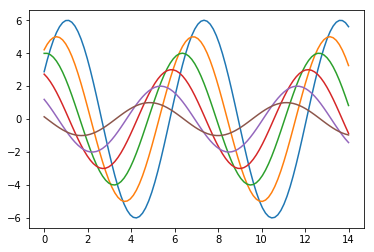

In [7]:
sinplot()

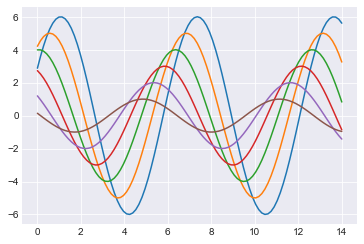

In [8]:
import seaborn as sns
sns.set_style("darkgrid")

sinplot()

Seaborn将matplotlib参数分成两个独立的组。第一组设定了美学风格，第二组则是不同的度量元素，这样就可以很容易地添加到代码当中了。

操作这些参数的接口是两对函数。为了控制样式，使用axesstyle()和setstyle()函数。为了扩展绘图，请使用plotting_context()和set_context()函数。在这两种情况下，第一个函数返回一个参数字典，第二个函数则设置matplotlib默认属性。

## 样式控制：axes_style() and set_style()

样式控制：axes_style() and set_style()
有5个seaborn的主题，适用于不同的应用和人群偏好：

darkgrid:黑色网格（默认）
whitegrid:白色网格
dark:黑色背景
white:白色背景
ticks:应该是四周都有刻度线的白背景？

网格能够帮助我们查找图表中的定量信息，而灰色网格主题中的白线能避免影响数据的表现，白色网格主题则类似的，当然更适合表达“重数据元素”
（heavy data elements不理解）

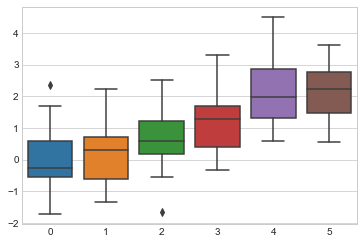

In [9]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

## 用despine()进行边框控制

In [ ]:
seaborn中通过despine()函数删除上方和右方坐标轴上不需要的边框

In [ ]:
sns.set_style("white")
sinplot() # 默认无参数状态，就是删除上方和右方的边框
sns.despine()

一些图的边框可以通过数据移位，当然调用despine()也能做同样的事。当边框没有覆盖整个数据轴的范围的时候，trim参数会限制留存的边框范围。

In [ ]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True); # offset 两坐标轴离开距离；

你也可以通过往despine()中添加参数去控制边框

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True) # 删除左边边框
st = sns.axes_style("darkgrid")

despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

从plot()函数中移除顶部或右边的边框

## 临时设定图形样式

虽然来回切换非常容易，但sns也允许用with语句中套用axes_style()达到临时设置参数的效果（仅对with块内的绘图函数起作用）。这也允许创建不同风格的坐标轴。

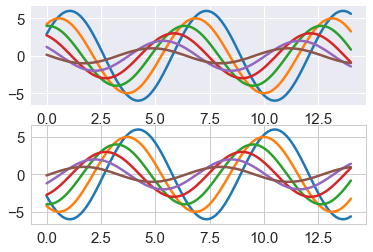

In [12]:
with sns.axes_style("darkgrid",rc={'font.size':1}):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

## seaborn样式中最重要的元素

如果您想要定制seanborn的样式，可以将参数字典传递给axes_style()和set_style()的rc参数。注意，只能通过该方法覆盖样式定义的一部分参数。(然而，更高层次的set()函数接受任何matplotlib参数的字典)。

如果您想要查看包含哪些参数，您可以只调用该函数而不带参数，这将返回当前设置的字典:

In [ ]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

## 通过 plotting_context() 和 set_context() 调整绘图元素

另一组参数控制绘图元素的规模，这应该让您使用相同的代码来制作适合在较大或较小的情节适当的场景中使用的情节。

首先，可以通过sns.set()重置参数。

四种预设，按相对尺寸的顺序(线条越来越粗)，分别是：
paper，
notebook,
talk,
poster
notebook的样式是默认的，上面的绘图都是使用默认的notebook预设。

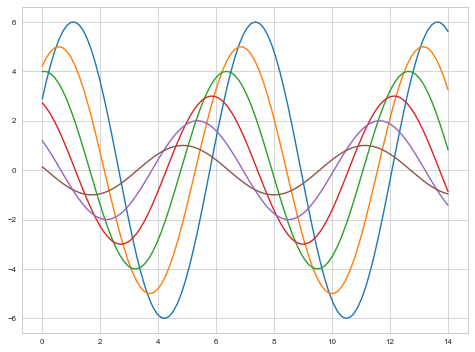

In [9]:
sns.set_context("paper")
plt.figure(figsize=(8,6))
sinplot()

类似的，还可以使用其中一个名称来调用set_context()来设置参数，您可以通过提供参数值的字典来覆盖参数。

通过更改context还可以独立地扩展字体元素的大小。(这个选项也可以通过顶级set()函数获得）。

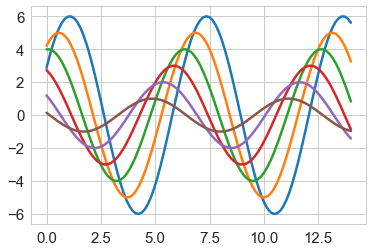

In [10]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

类似地(尽管它可能用处不大)，也可以使用with嵌套语句进行临时的设置。

样式和上下文都可以用set()函数快速地进行配置。这个函数还设置了默认的颜色选项，在下一节将详细介绍这一功能。